# EXAMPLE 1

In [ ]:
# Import necessary libraries
import numpy as np
import scipy as sc

In [2]:
# Define the coefficient matrix A
A=np.array([[1,3,5],[2,5,1],[2,3,8]])

In [3]:
print(A)

[[1 3 5]
 [2 5 1]
 [2 3 8]]


In [4]:
# Define the right-hand side vector B
B=np.array([[10],[8],[3]])

In [5]:
print(B)

[[10]
 [ 8]
 [ 3]]


In [6]:
# Calculate the inversse of A and multiply by B to find the solution vector
C=sc.linalg.inv(A).dot(B)

In [7]:
print(C)

[[-9.28]
 [ 5.16]
 [ 0.76]]


In [8]:
# Alternatively, use the solve function to find the solution vector directly
D=sc.linalg.solve(A,B)

In [9]:
print(D)

[[-9.28]
 [ 5.16]
 [ 0.76]]


# EXAMPLE 2

In [10]:
import numpy as np
from scipy.linalg import solve

In [12]:
# Coefficient matrix
A=np.array([[3,2],[1,2]])

In [15]:
# Constant vector
B=np.array([1,0])

In [16]:
# Using the solve function to find the solution to the system of equations
solution=solve(A,B)

In [17]:
print(solution)

[ 0.5  -0.25]


# SOLVING ODE

In [18]:
# Python program to implement Runge Kutta method
# A sample differential equation "dy / dx = (x - y)/2"

def dydx(x, y):
    return ((x - y)/2)

In [33]:
# Finds value of y for a given x using step size h and initial value y0 at x0.

def rungeKutta(x0, y0, x, h):
    # Count number of iterations using step size or step height
    n = int((x - x0)/h)
    
    # Iterate for number of iterations
    y = y0
    for i in range(1, n + 1):
        # Apply Runge Kutta Formulas to find next value of y
        k1 = dydx(x0, y)
        k2 = dydx(x0 + 0.5 * h, y + h*0.5 * k1)
        k3 = dydx(x0 + 0.5 * h, y + h*0.5 * k2)
        k4 = dydx(x0 + h, y + h*k3)
        
        # Update next value of y
        y = y + (1.0 / 6.0)*h*(k1 + 2 * k2 + 2 * k3 + k4)
        
        # Update next value of x
        x0 = x0 + h
    return y

# Driver method
x0 = 0
y = 1
x = 5
h = 0.2

print('The value of y at x is:', rungeKutta(x0, y, x, h))

n= int((x - x0)/h)
print(n)

for i in range (1, n + 1):
    print(i)



The value of y at x is: 3.2462555535430524
25
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


# Pressure Profile

In [34]:
# Importing necessary libraries
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [35]:
# parameter values for original SEIR
V=1154 #m3
R=8.314 #[J/(mol.K)]
T=120 #ºC

mass_in=473220 #kg/hr
MW_in=56.6
mass_out=28742 #kg/hr
MW_out=40.4

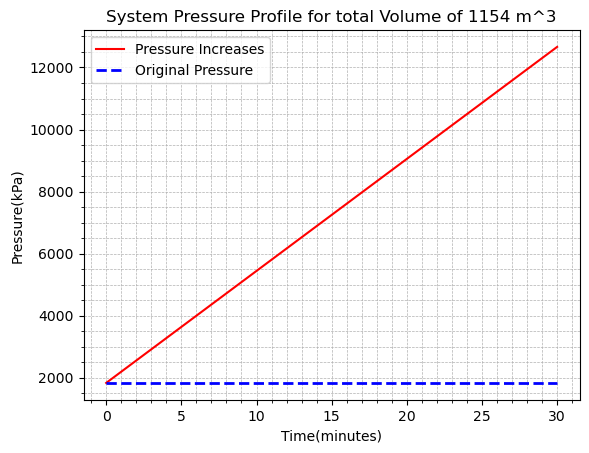

In [58]:
# calculation, time in minutes
Tk=T+273.15 #covert to Kelvin
mol_in=mass_in/MW_in/60 #kmol/min
mol_out=mass_out/MW_out/60 #kmol/min

# initial condition
P0=1830 #kPa

# differential equation using ideal gas
def dPdt(P,t):
    # the differential equations
    dpdt=(mol_in-mol_out)/(V/(R*Tk))
    
    return dpdt

# create the x axis for the integration
# time to repsonse is 20 minutes
start=0
end=30
t=np.linspace(start,end,end)

Pinitial=np.linspace(P0,P0,end)

# integration of the differential equation
P=sc.integrate.odeint(dPdt,P0,t)

# Plotting the results
plt.figure()
plt.plot(t,P,'r',label='Pressure Increases')
plt.plot(t,Pinitial,'b--',label='Original Pressure',linewidth=2)
plt.title(f'System Pressure Profile for total Volume of {V} m^3')
plt.xlabel('Time(minutes)')
plt.ylabel('Pressure(kPa)')
plt.grid(True,which='both',linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.show()

# Modelling a Zombie Apocalypse

In [59]:
# Importing the necessary libraries for numerical computations and plotting
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

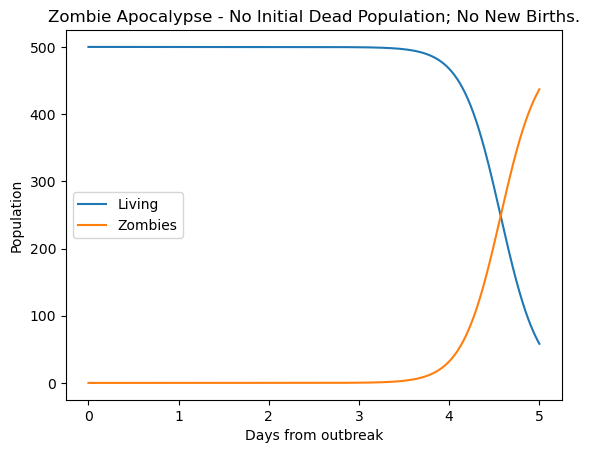

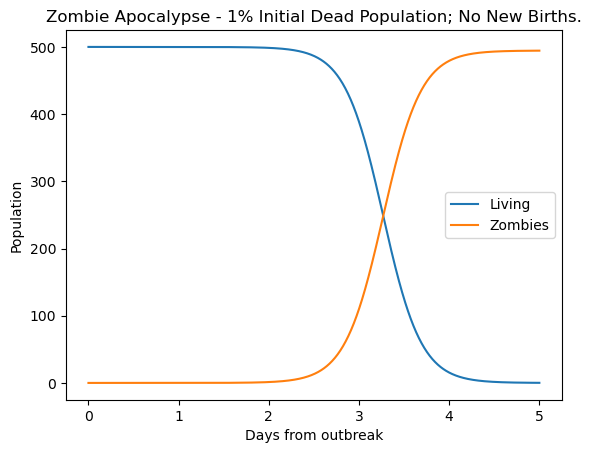

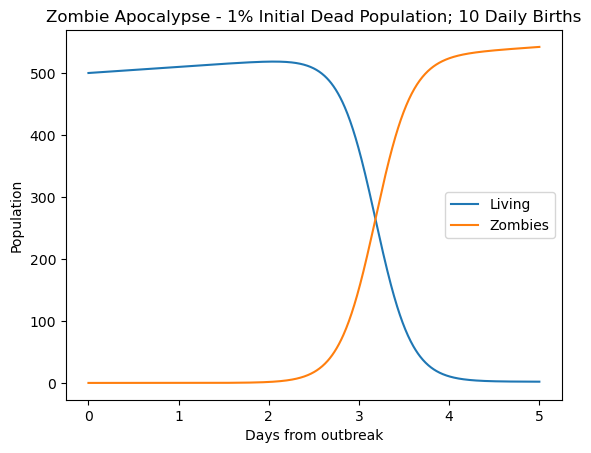

In [60]:
# Parameters for the model, representing various rates per day
P = 0  # Birth rate (new individuals per day)
d = 0.0001  # Natural death percent (probability of dying each day)
B = 0.0095  # Transmission percent (probability of a living becoming a zombie each day)
G = 0.0001  # Resurrect percent (probability of a dead becoming a zombie each day)
A = 0.0001  # Destroy percent (probability of a zombie being destroyed each day)


# The system of differential equations: y is the vector of populations, t is time
def f(y, t):
    Si = y[0]  # Susceptible (living) population
    Zi = y[1]  # Zombie population
    Ri = y[2]  # Removed (dead) population
    # Model equations for the rates of change of each population
    f0 = P - B * Si * Zi - d * Si  # Rate of change of living
    f1 = B * Si * Zi + G * Ri - A * Si * Zi  # Rate of change of zombies
    f2 = d * Si + A * Si * Zi - G * Ri  # Rate of change of dead
    return [f0, f1, f2]


# Initial conditions for the model
S0 = 500.0  # Initial population of living
Z0 = 0      # Initial zombie population
R0 = 0      # Initial dead population
y0 = [S0, Z0, R0]  # Vector of initial conditions
t = np.linspace(0, 5., 1000)  # Time grid for the simulation (0 to 5 days, 1000 points)


# Solving the differential equations over time t, starting from initial conditions y0
soln = sc.integrate.odeint(f, y0, t)
S = soln[:, 0]  # Extracting the solution for living
Z = soln[:, 1]  # Extracting the solution for zombies
R = soln[:, 2]  # Extracting the solution for dead

# Plotting the results for the initial scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Initial Dead Population; No New Births.')
plt.legend(loc=0)
plt.show()


# Changing the initial conditions for a scenario with 1% initial dead population
R0 = 0.01 * S0  # 1% of the initial population is dead
y0 = [S0, Z0, R0]  # Updating the initial conditions
soln = sc.integrate.odeint(f, y0, t)  # Solving the DEs again with new initial conditions
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Plotting the results for the second scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Initial Dead Population; No New Births.')
plt.legend(loc=0)
plt.show()


# Updating the parameters for the third scenario with daily births
P = 10  # 10 new births daily
y0 = [S0, Z0, R0]  # Initial conditions remain the same as the second scenario
soln = sc.integrate.odeint(f, y0, t)  # Solving the DEs with the new birth rate
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# Plotting the results for the third scenario
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Initial Dead Population; 10 Daily Births')
plt.legend(loc=0)
plt.show()